<a href="https://colab.research.google.com/github/hyeji0913/deeplearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1.Linear Function



In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
Hare_Speed = 2 #@param {type:"slider",min:0,max:10,step:1}

MAXVAL =10
INTERVAL = MAXVAL + 1
h_xdata, h_ydata = [],[]


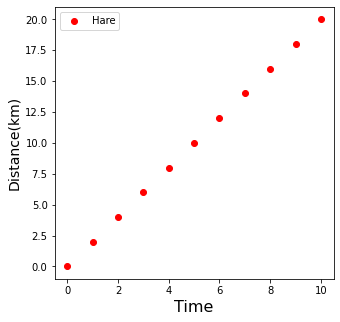

In [4]:
#configure figure size
plt.figure(figsize=(5,5))
for t in np.linspace(0,MAXVAL, INTERVAL):
    h_y = Hare_Speed*t
    h_xdata.append(t)
    h_ydata.append(h_y)
 
plt.plot(h_xdata, h_ydata, 'ro', label='Hare')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Distance(km)', fontsize=14)
plt.legend()

plt.show()

#2.hypothesis

In [5]:
Velocity_Variance =0.2 #@param {type:"slider",min:0,max:2,step:0.1}
LINES = 5

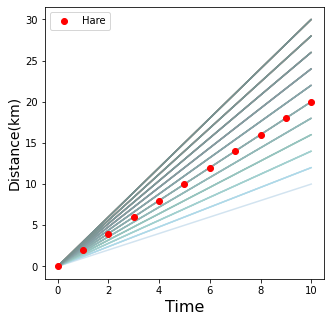

In [7]:
#configure figure size
plt.figure(figsize=(5,5))

a_val = Hare_Speed + (Velocity_Variance * LINES)
h_xdata, h_ydata, v_xdata,v_ydata =[], [], [], []
for t in np.linspace(0,MAXVAL, INTERVAL):
    h_y = Hare_Speed*t
    h_xdata.append(t)
    h_ydata.append(h_y)
    a= a_val - (t * Velocity_Variance)
    for i in np.linspace(0, MAXVAL, INTERVAL):
      h_y = a*i
      v_xdata.append(i)
      v_ydata.append(h_y)
    plt.plot(v_xdata,v_ydata, alpha=0.2)

plt.plot(h_xdata, h_ydata, 'ro', label='Hare')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Distance(km)', fontsize=14)
plt.legend()

plt.show()

#3.Cost,Gradient Decent

In [ ]:
import matplotlib.animation as animation

#configure figure size
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlim(-0.1,2.1)
ax.set_ylim(0,400)
t_xdata, t_ydata =[], []
